# AAVAIL Revenue Prediction - Enhanced Visualizations

This notebook contains all the enhanced visualizations with seaborn and advanced plotting techniques.
Run this after completing Part 1 data investigation to see beautiful, publication-ready charts.

In [1]:
# Import libraries
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load data
from data_ingestion import load_retail_data
df = load_retail_data('../data/Online Retail.xlsx')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("📊 Enhanced Visualizations Ready!")

INFO:data_ingestion:Loading data from: ../data/Online Retail.xlsx
INFO:data_ingestion:Raw data shape: (541909, 8)
INFO:data_ingestion:Missing CustomerIDs: 135080
INFO:data_ingestion:Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
INFO:data_ingestion:Countries: 38
INFO:data_ingestion:Unique customers: 4372


📊 Enhanced Visualizations Ready!


## 🌍 Enhanced Country Revenue Analysis

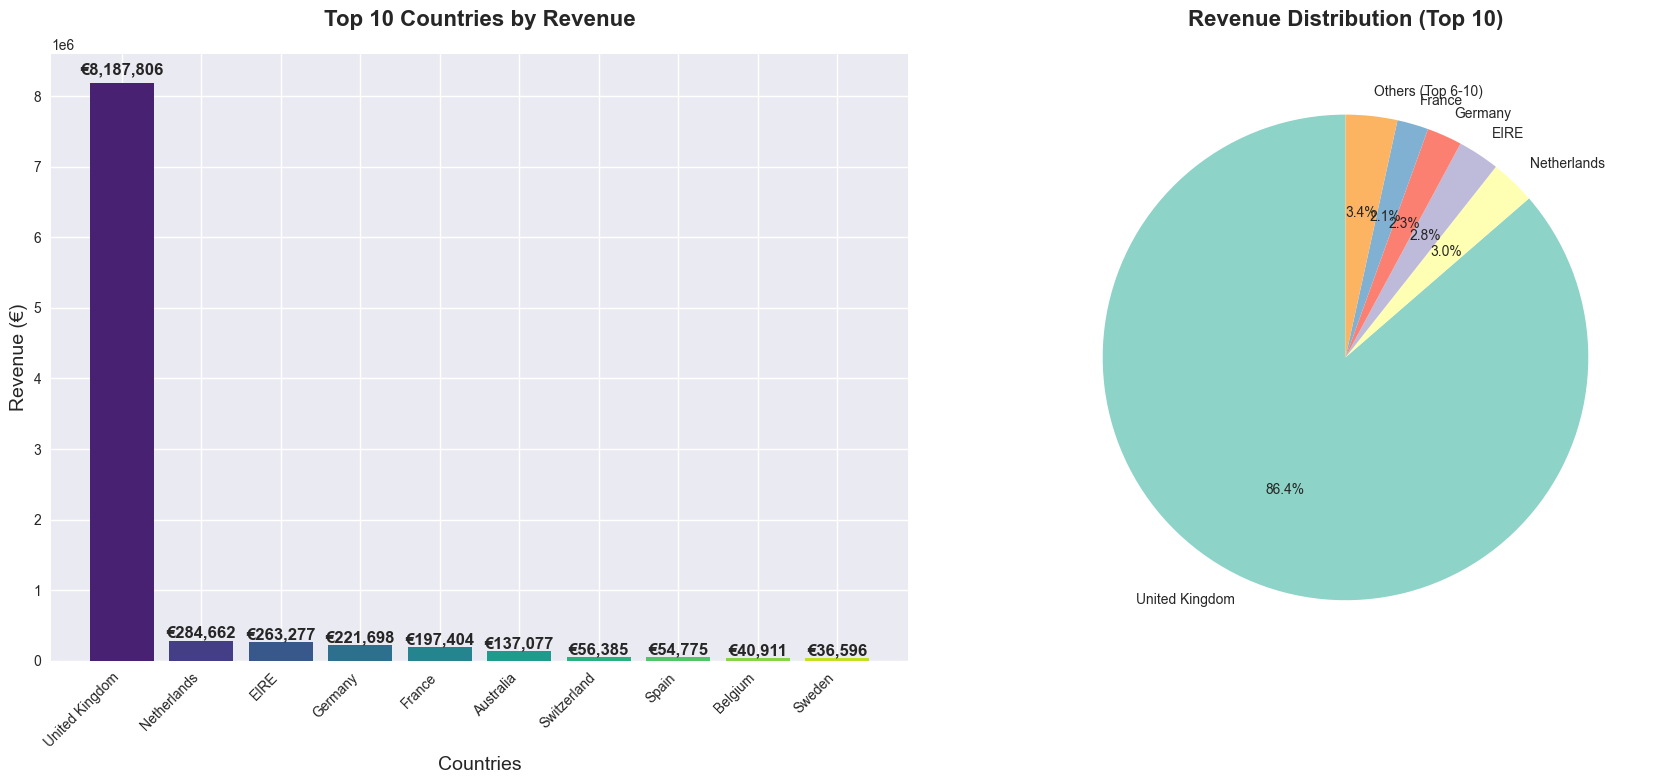

🎯 UK dominates with 84.0% of total revenue


In [2]:
# Calculate revenue and prepare data
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
top_10_countries = country_revenue.head(10)

# Create enhanced country revenue visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Enhanced bar plot with gradient colors
colors = sns.color_palette("viridis", len(top_10_countries))
bars = ax1.bar(range(len(top_10_countries)), top_10_countries.values, color=colors)
ax1.set_title('Top 10 Countries by Revenue', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Revenue (€)', fontsize=14)
ax1.set_xlabel('Countries', fontsize=14)
ax1.set_xticks(range(len(top_10_countries)))
ax1.set_xticklabels(top_10_countries.index, rotation=45, ha='right')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_10_countries.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
             f'€{value:,.0f}', ha='center', va='bottom', fontweight='bold')

# Revenue distribution pie chart
top_5 = top_10_countries.head(5)
others = top_10_countries[5:].sum()
pie_data = list(top_5.values) + [others]
pie_labels = list(top_5.index) + ['Others (Top 6-10)']

wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                   colors=sns.color_palette("Set3", len(pie_data)),
                                   startangle=90, textprops={'fontsize': 10})
ax2.set_title('Revenue Distribution (Top 10)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../reports/figures/enhanced_country_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"🎯 UK dominates with {(top_10_countries.iloc[0]/country_revenue.sum()*100):.1f}% of total revenue")

## 📅 Advanced Temporal Patterns

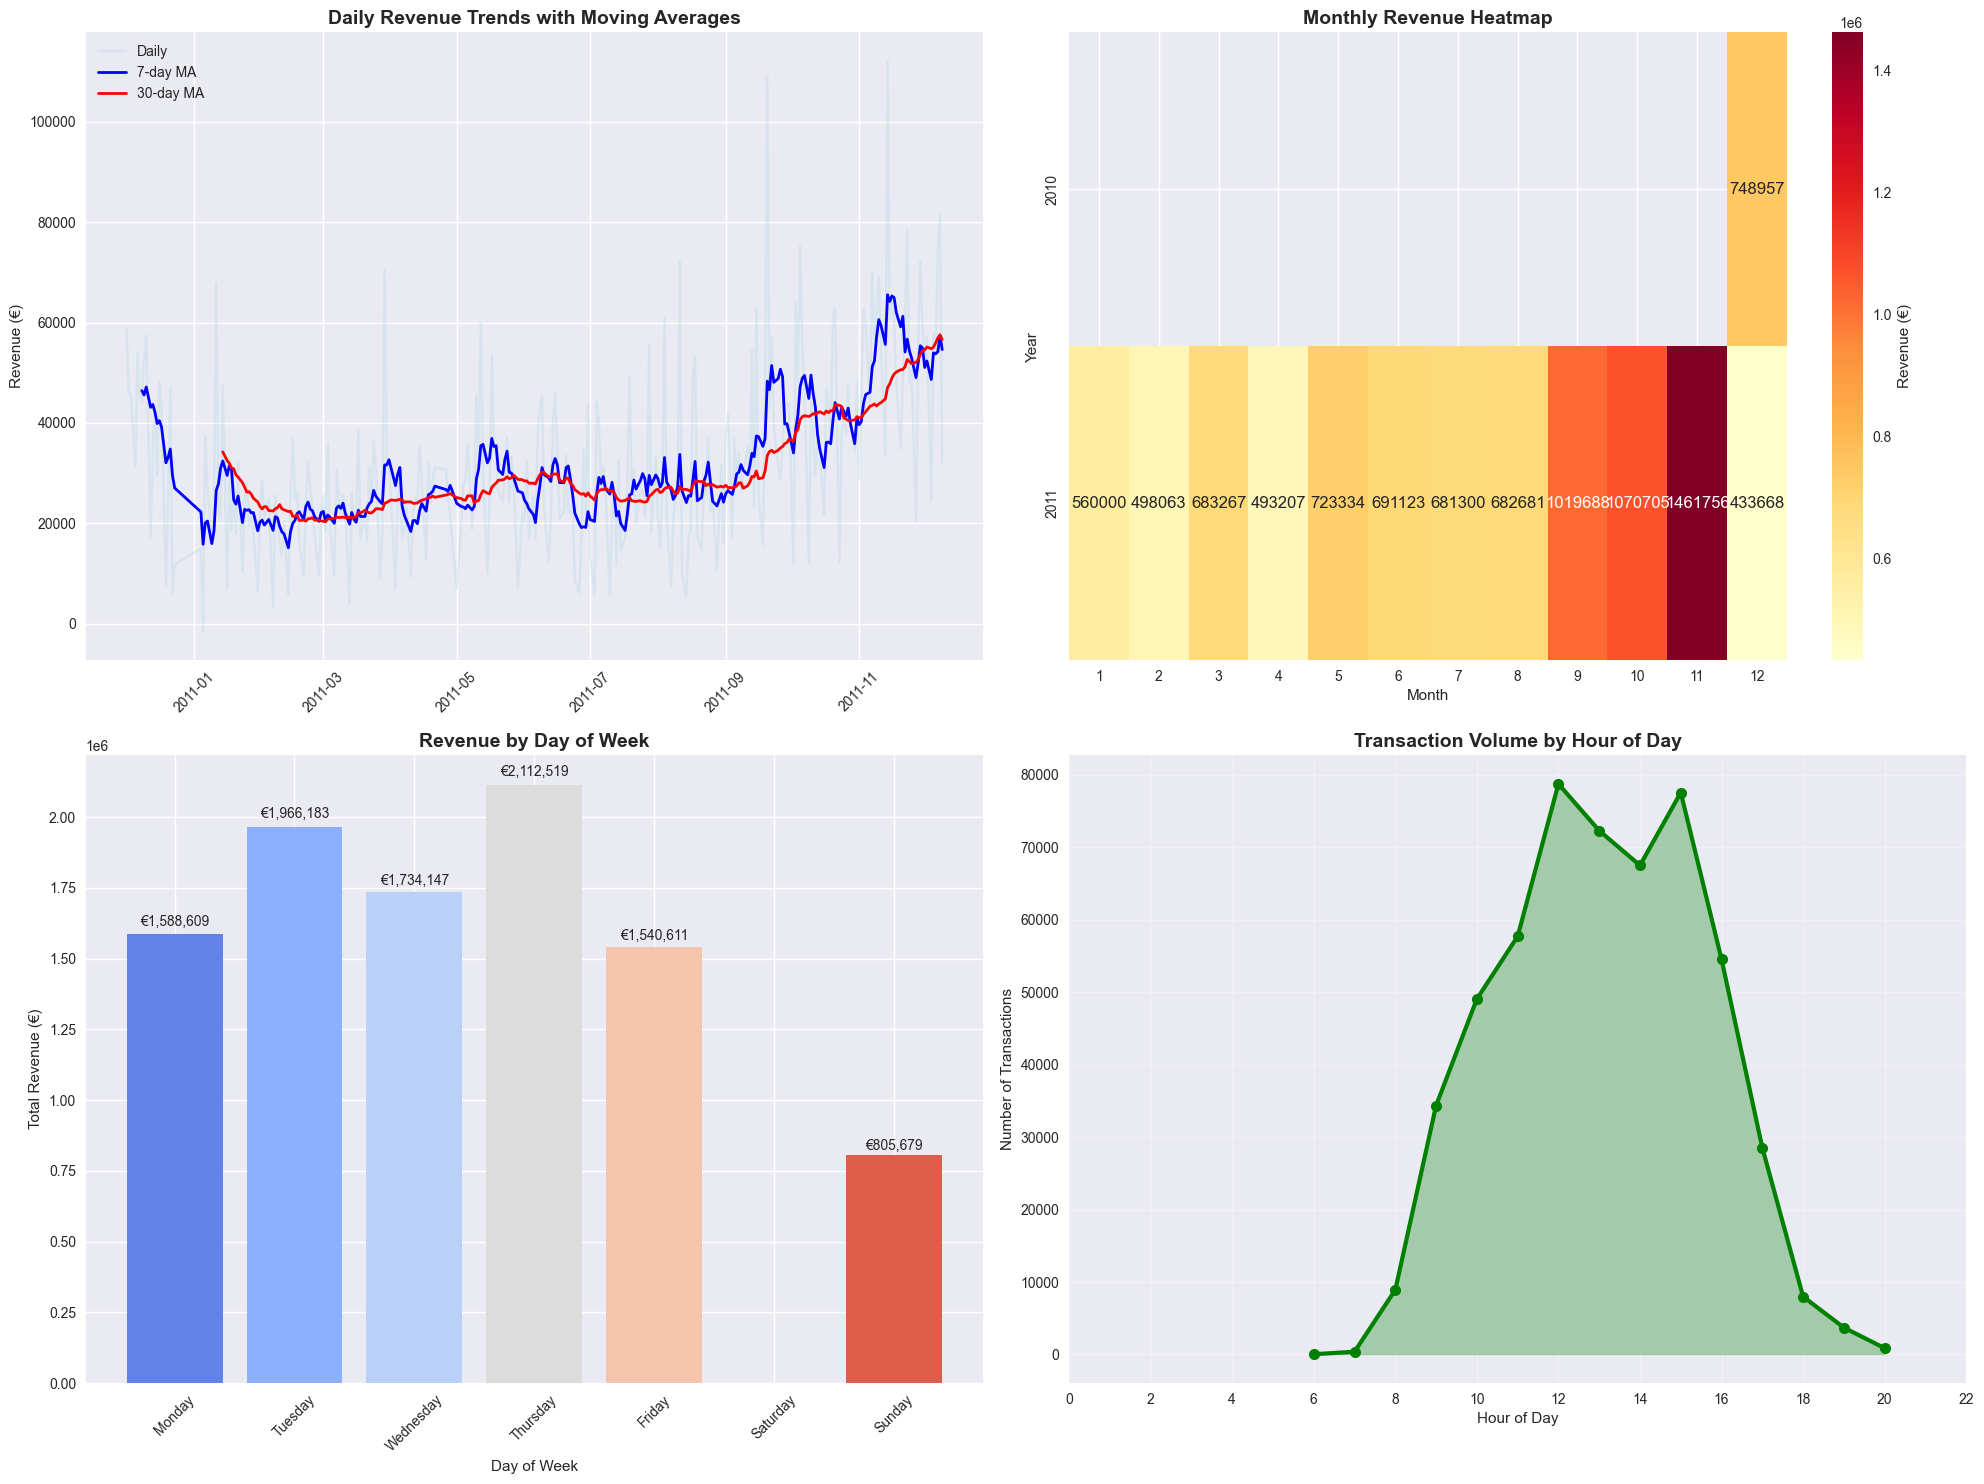

📊 Advanced temporal patterns revealed!


In [3]:
# Prepare temporal data
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Daily revenue trends
daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()
daily_revenue['Date'] = pd.to_datetime(daily_revenue['Date'])

# Create advanced temporal visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Daily Revenue Time Series with Moving Average
daily_revenue['MA7'] = daily_revenue['Revenue'].rolling(window=7).mean()
daily_revenue['MA30'] = daily_revenue['Revenue'].rolling(window=30).mean()

axes[0,0].plot(daily_revenue['Date'], daily_revenue['Revenue'], alpha=0.3, color='lightblue', label='Daily')
axes[0,0].plot(daily_revenue['Date'], daily_revenue['MA7'], color='blue', linewidth=2, label='7-day MA')
axes[0,0].plot(daily_revenue['Date'], daily_revenue['MA30'], color='red', linewidth=2, label='30-day MA')
axes[0,0].set_title('Daily Revenue Trends with Moving Averages', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Revenue (€)')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Monthly Revenue Heatmap
monthly_data = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_pivot = monthly_data.pivot(index='Year', columns='Month', values='Revenue')
sns.heatmap(monthly_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0,1], cbar_kws={'label': 'Revenue (€)'})
axes[0,1].set_title('Monthly Revenue Heatmap', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Year')

# 3. Day of Week Analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue = df.groupby('DayOfWeek')['Revenue'].agg(['sum', 'mean', 'count']).reindex(day_order)

x_pos = np.arange(len(day_order))
bars = axes[1,0].bar(x_pos, dow_revenue['sum'], color=sns.color_palette("coolwarm", 7))
axes[1,0].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Total Revenue (€)')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(day_order, rotation=45)

# Add value labels
for bar, value in zip(bars, dow_revenue['sum']):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
                   f'€{value:,.0f}', ha='center', va='bottom', fontsize=10)

# 4. Hourly Transaction Patterns
hourly_transactions = df.groupby('Hour').size()
axes[1,1].plot(hourly_transactions.index, hourly_transactions.values, marker='o', linewidth=3, markersize=8, color='green')
axes[1,1].fill_between(hourly_transactions.index, hourly_transactions.values, alpha=0.3, color='green')
axes[1,1].set_title('Transaction Volume by Hour of Day', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Transactions')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_xticks(range(0, 24, 2))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/daily_revenue_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Advanced temporal patterns revealed!")

## 👥 Customer Segmentation Visualization

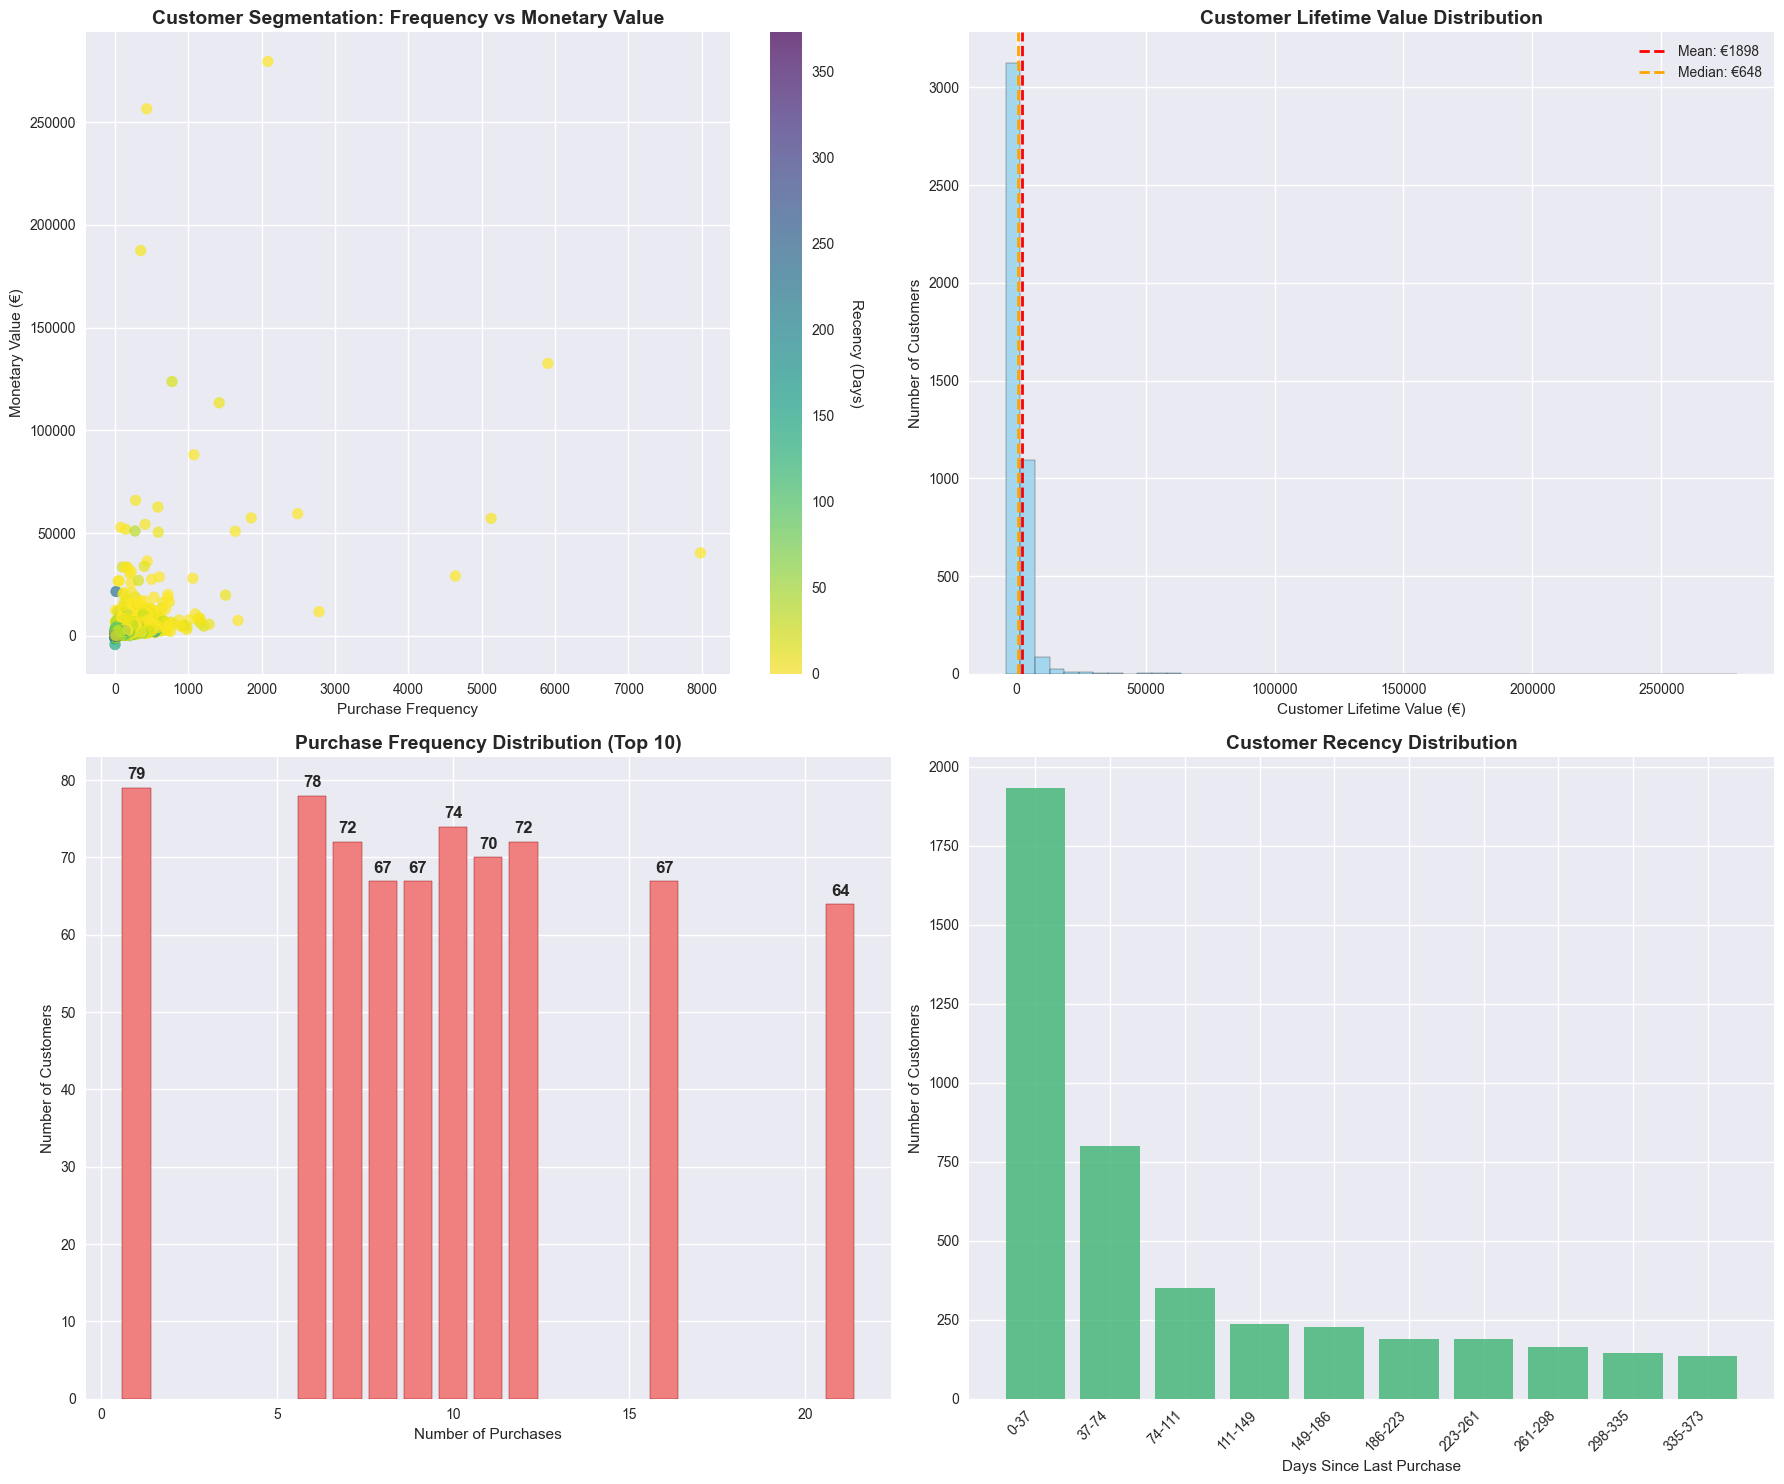

🔍 CUSTOMER INSIGHTS:
📊 Average CLV: €1898.46
🔝 Top 10% customers contribute: 60.0% of revenue
🔄 Average purchase frequency: 93.1 transactions
⏰ Average days since last purchase: 91 days


In [4]:
# Customer analysis (exclude missing CustomerIDs)
customer_data = df.dropna(subset=['CustomerID']).copy()

# Calculate RFM metrics
from datetime import datetime
analysis_date = customer_data['InvoiceDate'].max()

rfm = customer_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency  
    'Revenue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Create customer segmentation visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# 1. RFM Scatter Plot (Frequency vs Monetary)
scatter = axes[0,0].scatter(rfm['Frequency'], rfm['Monetary'], 
                          c=rfm['Recency'], cmap='viridis_r', alpha=0.7, s=60)
axes[0,0].set_title('Customer Segmentation: Frequency vs Monetary Value', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Purchase Frequency')
axes[0,0].set_ylabel('Monetary Value (€)')
cbar = plt.colorbar(scatter, ax=axes[0,0])
cbar.set_label('Recency (Days)', rotation=270, labelpad=20)

# 2. Customer Value Distribution
axes[0,1].hist(rfm['Monetary'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,1].axvline(rfm['Monetary'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: €{rfm['Monetary'].mean():.0f}")
axes[0,1].axvline(rfm['Monetary'].median(), color='orange', linestyle='--', linewidth=2, label=f"Median: €{rfm['Monetary'].median():.0f}")
axes[0,1].set_title('Customer Lifetime Value Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Customer Lifetime Value (€)')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].legend()

# 3. Purchase Frequency Analysis
freq_analysis = rfm['Frequency'].value_counts().head(10).sort_index()
bars = axes[1,0].bar(freq_analysis.index, freq_analysis.values, color='lightcoral', edgecolor='darkred')
axes[1,0].set_title('Purchase Frequency Distribution (Top 10)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Number of Purchases')
axes[1,0].set_ylabel('Number of Customers')

# Add value labels
for bar, value in zip(bars, freq_analysis.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
                   f'{value}', ha='center', va='bottom', fontweight='bold')

# 4. Recency Analysis
recency_bins = pd.cut(rfm['Recency'], bins=10)
recency_counts = recency_bins.value_counts().sort_index()
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in recency_counts.index]

axes[1,1].bar(range(len(recency_counts)), recency_counts.values, color='mediumseagreen', alpha=0.8)
axes[1,1].set_title('Customer Recency Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Days Since Last Purchase')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(bin_labels)))
axes[1,1].set_xticklabels(bin_labels, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../reports/figures/customer_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# Customer insights
print("🔍 CUSTOMER INSIGHTS:")
print(f"📊 Average CLV: €{rfm['Monetary'].mean():.2f}")
print(f"🔝 Top 10% customers contribute: {(rfm.nlargest(int(len(rfm)*0.1), 'Monetary')['Monetary'].sum() / rfm['Monetary'].sum() * 100):.1f}% of revenue")
print(f"🔄 Average purchase frequency: {rfm['Frequency'].mean():.1f} transactions")
print(f"⏰ Average days since last purchase: {rfm['Recency'].mean():.0f} days")

## 🎯 Business Performance Dashboard

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


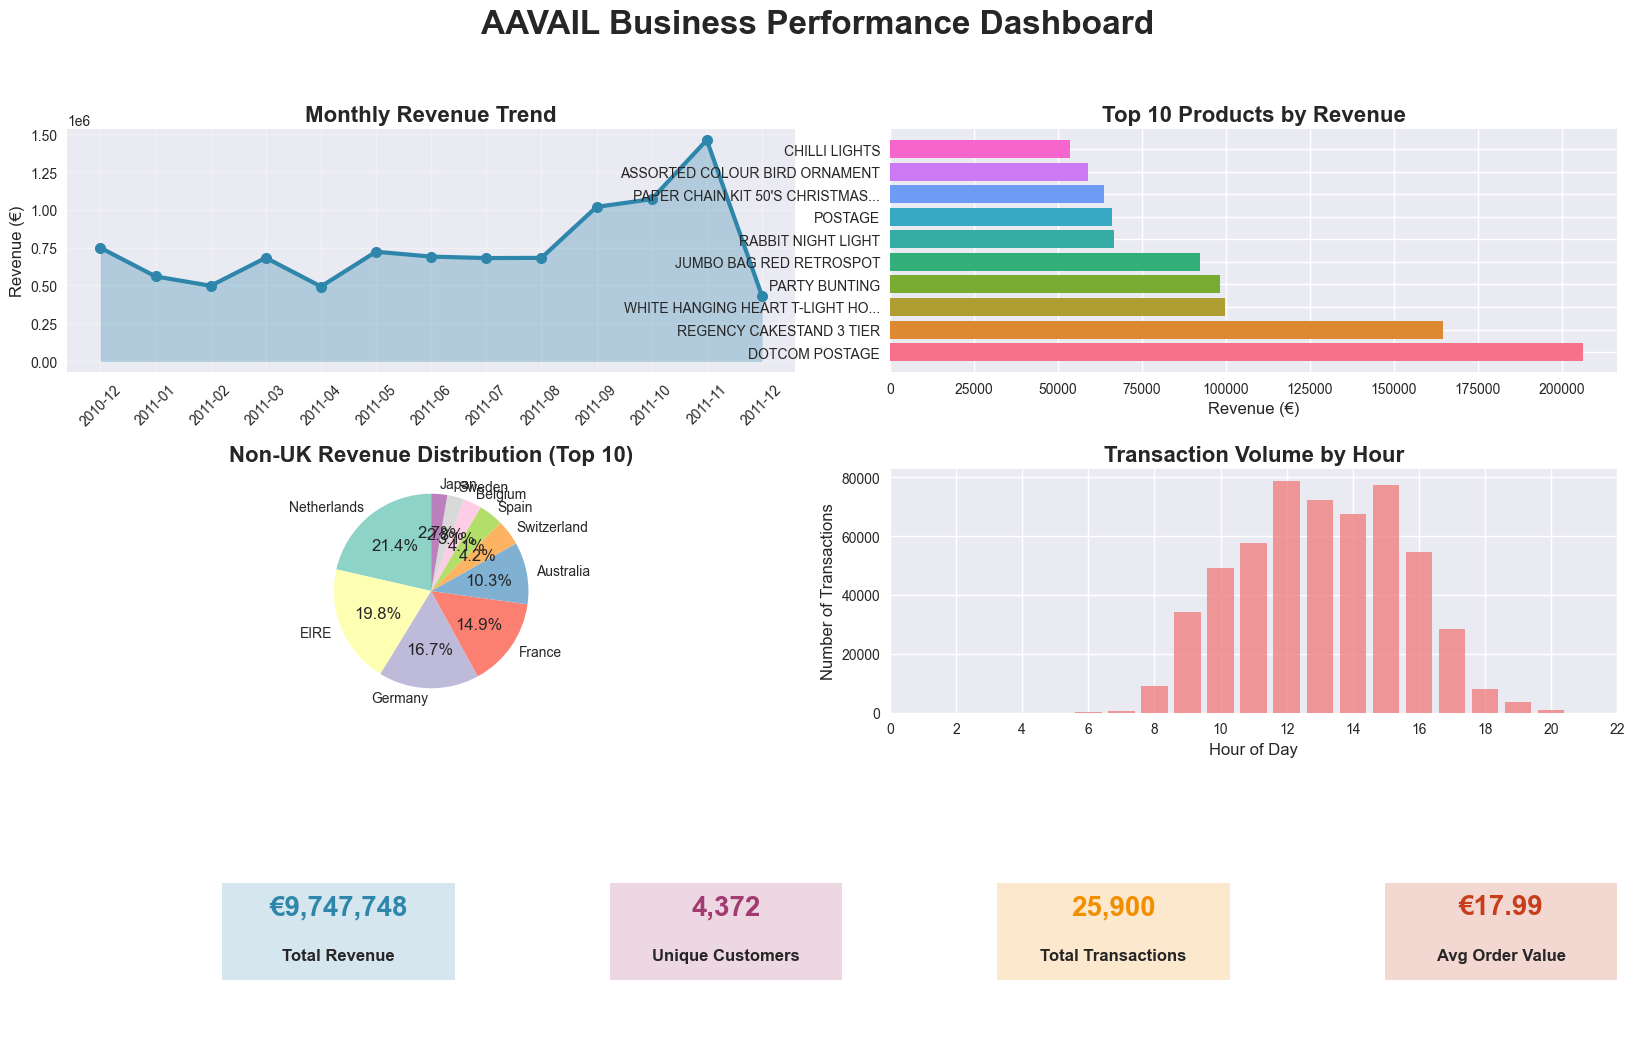

📊 Business Performance Dashboard Created!
💡 Peak transaction hour: 12:00 (78709 transactions)
🏆 Best performing month: 2011-11 (€1,461,756)


In [5]:
# Create comprehensive business dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3)

# Calculate key metrics
total_revenue = df['Revenue'].sum()
total_customers = df['CustomerID'].nunique()
total_transactions = df['InvoiceNo'].nunique()
avg_order_value = df['Revenue'].mean()

# Revenue by month trend
ax1 = fig.add_subplot(gs[0, :2])
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
ax1.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax1.fill_between(range(len(monthly_revenue)), monthly_revenue.values, alpha=0.3, color='#2E86AB')
ax1.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
ax1.set_ylabel('Revenue (€)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Top products by revenue
ax2 = fig.add_subplot(gs[0, 2:])
product_revenue = df.groupby('Description')['Revenue'].sum().nlargest(10)
colors = sns.color_palette("husl", len(product_revenue))
bars = ax2.barh(range(len(product_revenue)), product_revenue.values, color=colors)
ax2.set_yticks(range(len(product_revenue)))
ax2.set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in product_revenue.index], fontsize=10)
ax2.set_title('Top 10 Products by Revenue', fontsize=16, fontweight='bold')
ax2.set_xlabel('Revenue (€)', fontsize=12)

# Revenue distribution by country (excluding UK)
ax3 = fig.add_subplot(gs[1, :2])
non_uk_revenue = country_revenue[country_revenue.index != 'United Kingdom'].head(10)
wedges, texts, autotexts = ax3.pie(non_uk_revenue.values, labels=non_uk_revenue.index, 
                                   autopct='%1.1f%%', startangle=90, 
                                   colors=sns.color_palette("Set3", len(non_uk_revenue)))
ax3.set_title('Non-UK Revenue Distribution (Top 10)', fontsize=16, fontweight='bold')

# Transaction volume by hour
ax4 = fig.add_subplot(gs[1, 2:])
hourly_volume = df.groupby(df['InvoiceDate'].dt.hour).size()
bars = ax4.bar(hourly_volume.index, hourly_volume.values, color='lightcoral', alpha=0.8)
ax4.set_title('Transaction Volume by Hour', fontsize=16, fontweight='bold')
ax4.set_xlabel('Hour of Day', fontsize=12)
ax4.set_ylabel('Number of Transactions', fontsize=12)
ax4.set_xticks(range(0, 24, 2))

# Key Performance Indicators
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

# Create KPI boxes
kpi_data = [
    ('Total Revenue', f'€{total_revenue:,.0f}', '#2E86AB'),
    ('Unique Customers', f'{total_customers:,}', '#A23B72'),  
    ('Total Transactions', f'{total_transactions:,}', '#F18F01'),
    ('Avg Order Value', f'€{avg_order_value:.2f}', '#C73E1D')
]

for i, (label, value, color) in enumerate(kpi_data):
    x = i * 0.25 + 0.1
    # Create colored box
    box = plt.Rectangle((x, 0.3), 0.15, 0.4, facecolor=color, alpha=0.2, transform=ax5.transAxes)
    ax5.add_patch(box)
    
    # Add text
    ax5.text(x + 0.075, 0.6, value, transform=ax5.transAxes, ha='center', va='center', 
             fontsize=20, fontweight='bold', color=color)
    ax5.text(x + 0.075, 0.4, label, transform=ax5.transAxes, ha='center', va='center', 
             fontsize=12, fontweight='bold')

plt.suptitle('AAVAIL Business Performance Dashboard', fontsize=24, fontweight='bold', y=0.98)
plt.savefig('../reports/figures/business_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Business Performance Dashboard Created!")
print(f"💡 Peak transaction hour: {hourly_volume.idxmax()}:00 ({hourly_volume.max()} transactions)")
print(f"🏆 Best performing month: {monthly_revenue.idxmax()} (€{monthly_revenue.max():,.0f})")